# Model complexity - over & underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Generate samples
x = np.random.rand(100,1)
y = - x + 3 * (x ** 2) - 2 * (x ** 3) + 2 + np.random.rand(100,1) * 0.1
# Generate some outlier points in the dataset 
x_noise = np.random.rand(10,1)
y_noise = - x_noise + 3 * (x_noise ** 2) - 2 * (x_noise ** 3) + 2 \
                + np.random.rand(10,1) * 0.5
# Combine 'normal' points and 'outlier' points to a single training set
x_final = np.concatenate((x, x_noise), axis=0)
y_final = np.concatenate((y, y_noise), axis=0)

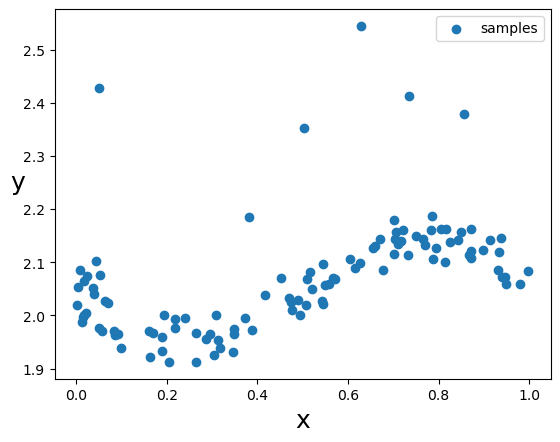

In [3]:
# Plot samples
plt.scatter(x_final,y_final, label='samples')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend()

Split the samples in test and train datasets as shown in the class

In [4]:
def plot_poly(coeffs, x_range):
    x = np.linspace(x_range[0], x_range[1], 50)
    y = np.polyval(coeffs, x) 
    plt.plot(x, y, '-', linewidth=3, color='gray', label='unknown function')
    #plt.title('Polynomial of order {}'.format(len(coeffs)-1))
    plt.xlabel('x')
    plt.ylabel('y=f(x)')
    plt.grid()


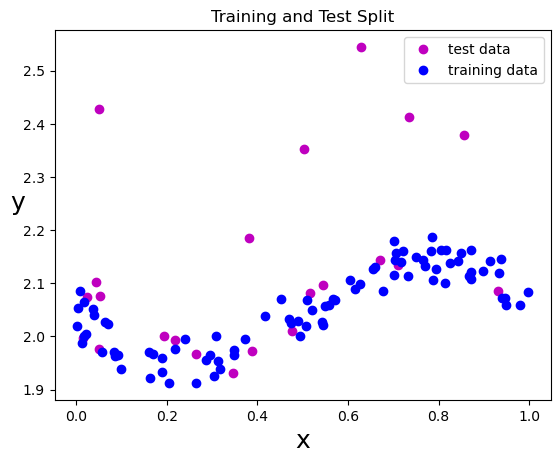

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_final, y_final, test_size=0.2, random_state = 0, shuffle = False)

plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)


plt.plot(X_test, Y_test, 'om', markersize=6, label='test data')
plt.plot(X_train, Y_train,'o', color='blue', markersize=6, label='training data')
plt.title('Training and Test Split')
plt.legend()


# Model of degree 1.


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
polynomial_features = PolynomialFeatures(1, include_bias=False)
linear_regression = LinearRegression()
pipeline1 = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ('scaler', scaler),            
        ("linear_regression", linear_regression),
    ]
)
pipeline1.fit(X_train, Y_train)





Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [7]:
Y_hat_test = pipeline1.predict(X_test)
Y_hat_train = pipeline1.predict(X_train)
from sklearn import metrics

mse_train = metrics.mean_squared_error(Y_train, Y_hat_train)
mse_test = metrics.mean_squared_error(Y_test, Y_hat_test)
print("Training/In-sample error is ", mse_train)
print("Test/out-of-sample/generalization error is ", mse_test)

Training/In-sample error is  0.0023807400299446324
Test/out-of-sample/generalization error is  0.0347477032361438


# Model of degree 3

In [8]:
scaler = StandardScaler()
polynomial_features = PolynomialFeatures(3, include_bias=False)
linear_regression = LinearRegression()
pipeline3 = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ('scaler', scaler),            
        ("linear_regression", linear_regression),
    ]
)
pipeline3.fit(X_train, Y_train)


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [9]:
Y_hat_test = pipeline3.predict(X_test)
Y_hat_train = pipeline3.predict(X_train)
from sklearn import metrics

mse_train = metrics.mean_squared_error(Y_train, Y_hat_train)
mse_test = metrics.mean_squared_error(Y_test, Y_hat_test)
print("Training/In-sample error is ", mse_train)
print("Test/out-of-sample/generalization error is ", mse_test)

Training/In-sample error is  0.0006695333104369633
Test/out-of-sample/generalization error is  0.030624907509128673


# Iterative Degree Increase

In [10]:
mse_history = {'mse_train': [],
               'mse_test': []}
degrees = [1,2,3,4,5,6,7,8,10,12,16,20,25,30]
for i in range(len(degrees)):
    degree = degrees[i]
    scaler = StandardScaler()
    polynomial_features = PolynomialFeatures(degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ('scaler', scaler),            
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train, Y_train)
    Y_hat_test = pipeline.predict(X_test)
    Y_hat_train = pipeline.predict(X_train)
    mse_train = metrics.mean_squared_error(Y_train, Y_hat_train)
    mse_test = metrics.mean_squared_error(Y_test, Y_hat_test)

    mse_history['mse_train'].append(mse_train)
    mse_history['mse_test'].append(mse_test)

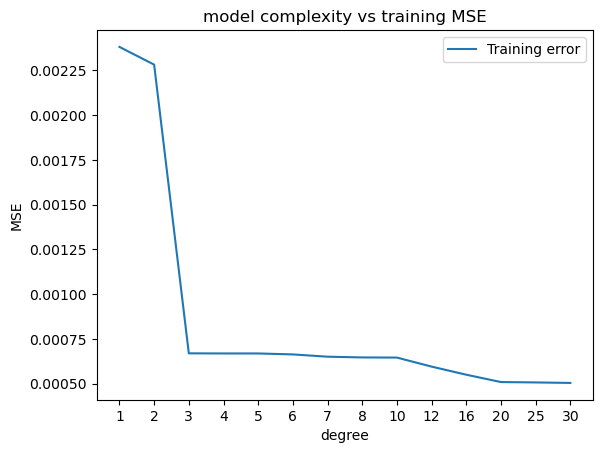

In [11]:
plt.figure()
plt.title('model complexity vs training MSE')
plt.plot(mse_history['mse_train'], label='Training error')
plt.xlabel("degree")
plt.ylabel("MSE")
#plt.ylim([-0.1, 10])
plt.xticks(np.arange(len(degrees)), degrees)
plt.legend()

# Analysis:
Dramatic reduction in the training error when the model complexity is increased to 3. 

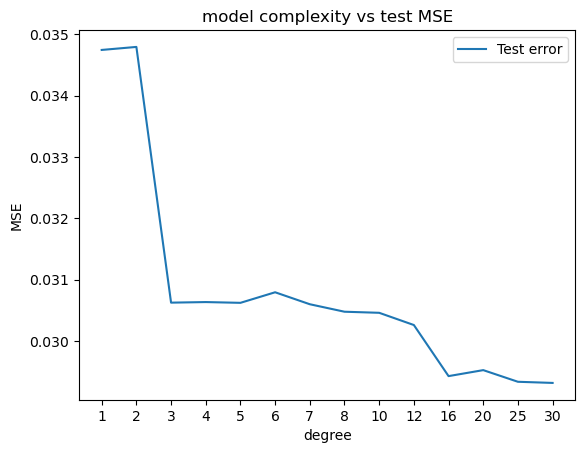

In [12]:
plt.figure()
plt.title('model complexity vs test MSE')
plt.plot(mse_history['mse_test'], label='Test error')
plt.xlabel("degree")
plt.ylabel("MSE")
#plt.ylim([-0.1, 10])
plt.xticks(np.arange(len(degrees)), degrees)
plt.legend()

The effect of model complexity on test error is not that dramatic when the model complexity is increased. we stay at degree 3. 